In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#################################################
#function definition for making plot of sector distribution
#################################################
def bar_sectors(filename):
    df = pd.read_csv("stock_data.csv")
    sector_counts = df['sector'].value_counts()
    sector_counts.plot(kind = 'bar')
    plt.title('Stock Ticker Counts per Sector', fontweight='bold')
    plt.xlabel('Sector', fontweight='bold')
    plt.ylabel('Number of Tickers', fontweight='bold')
    plt.savefig(f'images/sector_counts.png')

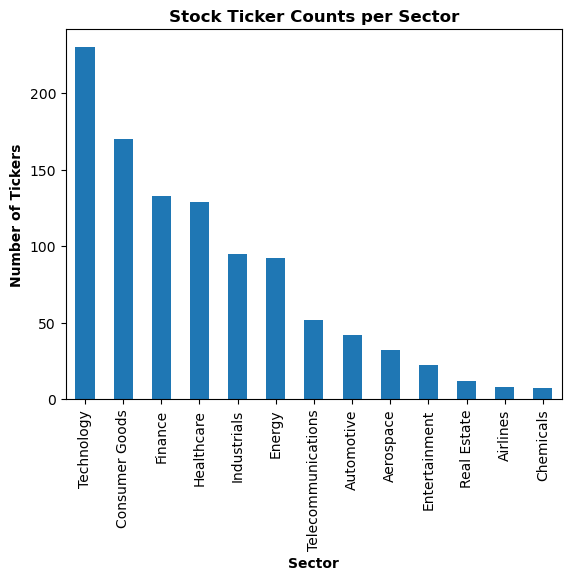

In [28]:
#################################################
#function call for making plot of sector distribution
#################################################
bar_sectors('stock_data.csv')

In [30]:
#function for creating sentiment vs. price plots
def time_vs_price_and_sentiment(ticker, filename, sentiment):
    df = pd.read_csv("stock_data.csv").dropna()
    stock_df = df[df['ticker']== ticker]
    plt.plot(stock_df['Date'], stock_df['Open'], label = f'{ticker} Price', color = 'blue', marker = '.')
    plt.xticks(rotation=90)
    plt.xlabel('Date (YYYY-MM-DD)', fontweight = 'bold')
    plt.ylabel(f'{ticker} Price (USD)', fontweight = 'bold', color = 'blue')
    plt.gca().get_yaxis().set_tick_params(labelcolor='blue')
    
    ax2 = plt.gca().twinx()
    ax2.plot(stock_df['Date'], stock_df[f'{sentiment}-count-finbert'],label = f'{sentiment.capitalize()} Sentiment Score', color = 'red',  marker = '.')
    ax2.set_ylabel(f'{sentiment.capitalize()} Sentiment Score (Number of Articles)', fontweight='bold', color = 'red')
    ax2.get_yaxis().set_tick_params(labelcolor='red')
    plt.title(f'{ticker} Stock Price vs. {sentiment.capitalize()} Sentiment Over Time', fontweight='bold')
    plt.savefig(f'images/{ticker}_{sentiment}_time.png')

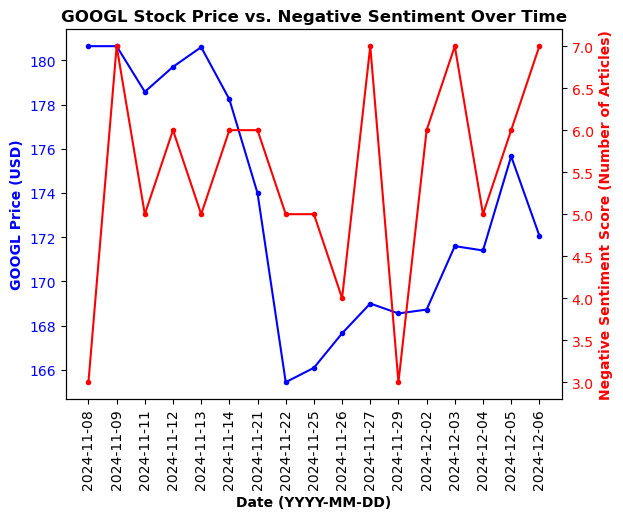

In [32]:
#################################################
#Change these values to ticker and sentiment of 
#interest. Sentiments can take on values of 'positive', 
#'negative', or 'neutral'. This also saves the image created
#in an images folder
sentiment = 'negative'
ticker = 'GOOGL'
filename = 'stock_data.csv'
#################################################
time_vs_price_and_sentiment(ticker, filename, sentiment)